# Supporting Information:<br>Micropatterned Carbon-on-Quartz Electrode Chips for Photocurrent Generation from Thylakoid Membranes
Bunea, Ada-Ioana; Heiskanen, Arto; Pankratova, Galina; Tesei, Giulio; Lund, Mikael; Åkerlund, Hans-Erik; Leech, Donal; Larsen, Niels; Sylvest Keller, Stephan; Gorton, Lo; Emnéus, Jenny

## Model

At $t=0$, we assume the generated electrons to be uniformly ditributed within a square surface of area $A=L^2$. We calculate the probability that during a time interval $\Delta t$ an electron has reached the sides of the square, given that it is absorbed the first time it hits the boundary of the region.

We use the analytical expression of the exit probability for freely diffusing particles within a square with absorbing boundaries [1,2]. For a particle located at $(x_0,y_0)$ at $t=0$, the exit probability at $t=\Delta t$ is given by
$$
P(x_0,y_0,L,\Delta t,D) = \frac{16}{\pi^2} \left[ \sum_{n=0}^{n=\infty} \frac{(-1)^n}{2n+1} \exp \left( -(2n+1)^2\pi^2 \frac{\Delta t D}{L^2} \right ) \cos \left ( \frac{(2n+1)\pi x_0}{L} \right) \right] \left[ \sum_{n=0}^{n=\infty} \frac{(-1)^n}{2n+1} \exp \left( -(2n+1)^2\pi^2 \frac{\Delta t D}{L^2} \right ) \cos \left ( \frac{(2n+1)\pi y_0}{L} \right) \right].
$$

$P(x_0,y_0,L,\Delta t,D)$ is integrated over the uniform distribution of the electrons generated at $t=0$ to obtain the average exit probability 
$$
\bar{P}(L,\Delta t,D) = \frac{1}{L^2} \int_{x_0=-L/2}^{x_0=L/2} \mbox{d}x_0 \int_{y_0=-L/2}^{y_0=L/2} \mbox{d}y_0 P(x_0,y_0,L,\Delta t,D) 
$$

The current generated by the chip, $I_{pa}(L)$, is related to $\bar{P}(L,\Delta t,D)$ via
$$
I_{pa}(L,\Delta tD,m,q) = m \times \bar{P}(L,\Delta t,D) + q
$$
where $\Delta t \times D$, $m$, and $q$ are fitting parameters.
The experimental current values for the devices with the two mediators (Ru complex and Os-RP) are fitted to $I_{pa}(L,\Delta tD,m,q)$. We obtain $m\approx16 \pm 1$ $\mu$A for both data sets, whereas $q$ is $10.3\pm0.5$ $\mu A$ and $5\pm1$ $\mu$A for the Ru complex and Os-RP, respectively. 

The fact that $m$ has the same value for both mediators suggests that $m$ might be related to $N e / \Delta t$ where $N$ is the number of electrons diffusing in the chip, and $e\approx1.602\times 10^{-19}$ C is the elementary charge. From this relation we can estimate that, during $\Delta t$, $N$ has a lower bound of $\mathcal{O}(10^{14})$. Conversely, $q$ largely differs between Os-RP and [Ru(NH$_3$)$_6$]Cl$_3$ indicating that its value might be related to the efficiency of transfer from the thylakoid membrane to the mediator, or from the mediator to the electrode.

In [1]:
import scipy.special as sp
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pylab import cm, imshow, contour, clabel, colorbar
from matplotlib.ticker import FormatStrFormatter
import scipy.optimize as opt
import warnings
warnings.filterwarnings('ignore')

Exit probability as a function of the starting point in a square surface of area $L^2$.

In [2]:
def ProbMatrix(L,tD):
    ''' L is the side length of the square, 
    tD is the product of the time interval times the diffusion coefficient. '''
    bins = L*2+1
    P = np.zeros(shape=(bins,))
    hL = L/2.
    x = np.linspace(-hL,hL,bins)
    for n in range(10000):
        k = 2*n+1
        P += ((-1)**n)/k*np.exp(-tD*(k*np.pi/L)**2)*np.cos(k*np.pi*x/L)
    return np.ones(shape=(bins,bins))-((4/np.pi)**2)*np.outer(P,P)    

Exit probability at the center of the opening.

In [3]:
prob1 = np.empty(0)
for l in range(7,100):
    mm = ProbMatrix(l,85) # Ru complex
    prob1 = np.append(prob1,mm[l,l])
prob2 = np.empty(0)
for l in range(7,100):
    mm = ProbMatrix(l,100) # Os-RP
    prob2 = np.append(prob2,mm[l,l])

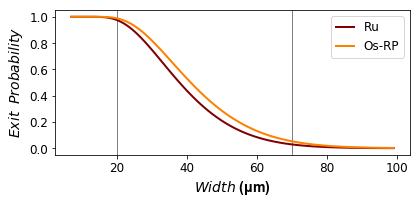

In [4]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': [6.0, 3]})
plt.plot(np.arange(7,100,1.0),prob1,color='#800001',label='Ru',lw=2)
plt.plot(np.arange(7,100,1.0),prob2,color='#fd8000',label='Os-RP',lw=2)
plt.vlines(x=20,ymin=-.05,ymax=1.05,color='k',lw=0.5)
plt.vlines(x=70,ymin=-.05,ymax=1.05,color='k',lw=0.5)
plt.legend(handlelength=1.5)
plt.ylim(-0.05,1.05)
plt.ylabel('$Exit$  $Probability$',{'fontname':'Arial','weight':'bold','size':14})
plt.xlabel(r'$Width$ (μm)',{'fontname':'Arial','weight':'bold','size':14})
plt.tight_layout()
plt.show()

Average exit probability from the square of side lenght $L$ with absorbing boundaries.

In [5]:
def ProbAvg(larray,tD,m,q):
    ''' larray is an array of side lengths of the square surfaces, 
    tD is the product of the time interval times the diffusion coefficient,
    m is a multiplicative parameter,
    q is an additive parameter. '''
    Parray = np.empty(0)
    for L in larray: 
        bins = L*2+1
        avg = ProbMatrix(L,tD).sum().sum()/bins/bins
        Parray = np.append(Parray,avg)
    return m*Parray+q

Bootstrap method.

In [6]:
def func(larray, p):
    tD, m, q  = p
    return ProbAvg(larray,tD,m,q)
def err(p, x, y):
    return func(x, p) - y

Experimental data.

In [7]:
currentsRu = [26.7,20.9,16.8,13.8,11.6] # experimental currents Ru
currentsRuerr = 2*np.array([.4,.3,.2,.3,.3]) # experimental errors Ru
currentsOs = [21.5,16.8,11.4,9.3,5.8] # experimental currents Os-RP
currentsOserr = 2*np.array([.3,.1,.3,.2,.5]) # experimental errors Os-RP
larray = np.array([20,50,100,200,400]) # hole sizes

### Optimized parameters from the data set for the Ru complex

The effective two-dimensional diffusion coefficient obtained from the fit is around 30 times smaller than the experimentally determined diffusion coefficient of [Ru(NH$_3$)$_6$]Cl$_3$ in 0.1 M phosphate buffer pH 7.0 [3]. The diffusion coefficient of the ruthenium complex is expected to be lower in the thylakoid dispersion than in aqueous electrolyte solutions. The neglect of out-of-plane displacements in the model further accounts for the lower value of the effective 2D diffusion coefficient compared to the experimental value in 3D.

In [8]:
popt1, pcov = curve_fit(ProbAvg, larray, currentsRu, sigma=currentsRuerr, bounds=([80,12,0],[100,17,11]))
perr1 = np.sqrt(np.diag(pcov))
print('Errors in the fit parameters are estimated from the covariance matrix:')
print('Diffusion coefficient (assuming ∆t = 5 s): {:1.0f}'.format(popt1[0]/5),
      '± {:1.0f}'.format(perr1[0]/5),'µm^2/s')
print('Multiplying factor: {:1.0f}'.format(popt1[1]),'± {:1.0f}'.format(perr1[1]),'µA')
print('Additive factor: {:1.1f}'.format(popt1[2]),'± {:1.1f}'.format(perr1[2]),'µA')

Errors in the fit parameters are estimated from the covariance matrix:
Diffusion coefficient (assuming ∆t = 5 s): 17 ± 3 µm^2/s
Multiplying factor: 16 ± 1 µA
Additive factor: 10.3 ± 0.5 µA


### Optimized parameters from the data set for the Os-RP
The electron transport through the Os-RP occurs by an electron-hopping mechanism and can be treated as a diffusive process [4]. The effective diffusion coefficient of electrons transported through conductive polymers was estimated to be three orders of magnitude lower than in solution. The effective in-plane diffusion coefficient obtained from fitting the Os-RP data set to the model is only four times smaller than the corresponding value for the Ru complex. 

In [9]:
popt2, pcov = curve_fit(ProbAvg, larray, currentsOs, sigma=currentsOserr, bounds=([80,16,0],[120,20,6]))
perr2 = np.sqrt(np.diag(pcov))
print('Errors in the fit parameters are estimated from the covariance matrix:')
print('Diffusion coefficient (assuming ∆t = 25 s): {:1.0f}'.format(popt2[0]/25),
      '± {:1.0f}'.format(perr2[0]/25),'µm^2/s')
print('Multiplying factor: {:1.1f}'.format(popt2[1]),'± {:1.0f}'.format(perr2[1]),'µA')
print('Additive factor: {:1.0f}'.format(popt2[2]),'± {:1.0f}'.format(perr2[2]),'µA')

Errors in the fit parameters are estimated from the covariance matrix:
Diffusion coefficient (assuming ∆t = 25 s): 4 ± 1 µm^2/s
Multiplying factor: 16.2 ± 1 µA
Additive factor: 5 ± 1 µA


### Comparison with experiments and exit probability distributions

The plot on the left hand side shows the experimental data and the corresponding curves obtained from the model.
Colormaps show the exit probability of electrons generated on the square surface surface. Electrons generated near the boundary have higher probability to diffuse out of the confined area in the time interval $\Delta t$.
The holes have areas $L^2$ with $L=$ 20, 50, 100, 200, 400 $\mu$m.

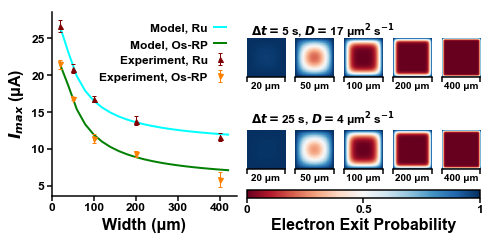

In [10]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': [7, 3.5], 
                     'savefig.dpi': 300, 'legend.fontsize': 16, 'legend.frameon': False,
                     'legend.labelspacing':0.5,'axes.labelpad':5,
                     'xtick.major.width':1.5, 'xtick.major.size':5, 'ytick.major.width':1.5, 'ytick.major.size':5,
                     'legend.numpoints':1,'xtick.direction':'out','ytick.direction':'out',
                     'axes.linewidth':1.5,'xtick.labelsize':12,'ytick.labelsize':12,
                     'axes.labelsize':16,'xtick.major.pad':2, 'ytick.major.pad':2})

mpl.rc('font', family='Arial', weight='bold')
font = {'fontname':'Arial','weight':'bold'}

largelarray = np.arange(20,425,20)

fig = plt.figure(figsize=(7, 3.5))
ax1 = plt.subplot2grid((2, 9), (0, 0), colspan=4,rowspan=2)

ax1.plot(largelarray, ProbAvg(largelarray,popt1[0],popt1[1],popt1[2]),
         color='#01ffff',lw=2,label='Model, Ru')
ax1.plot(largelarray, ProbAvg(largelarray,popt2[0],popt2[1],popt2[2]),
         color='#028002',lw=2,label='Model, Os-RP')
ax1.errorbar(larray,currentsRu,currentsRuerr,mec='#800001',marker='^',lw=0,ms=5,mfc='#800001',
         mew=1,label='Experiment, Ru',elinewidth=1,capsize=2,capthick=0,ecolor='#800001')
ax1.errorbar(larray,currentsOs,currentsOserr,mec='#fd8000',marker='v',lw=0,ms=5,mfc='#fd8000',
         mew=1,label='Experiment, Os-RP',elinewidth=1,capsize=2,ecolor='#fd8000')
ax1.set_ylabel(u'$I_{max}$ (μA)',font)
ax1.set_xlabel(u'Width (μm)',font)
ax1.legend(loc='upper right',fontsize=12, 
           handlelength=1, handletextpad=0.5,markerfirst=False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

for i,L in enumerate(np.tile(larray,2)):
    tD = popt1[0]
    col = 0
    row = i + 4
    if i > 4:
        tD = popt2[0]
        col = 1
        row = i - 1
    ax = plt.subplot2grid((2, 9), (col, row))
    P = ProbMatrix(L,tD) 
    hL = L/2.
    im = ax.imshow(P,cmap=cm.RdBu,extent=[-hL,hL,-hL,hL],origin='lower',aspect='equal',vmin=0,vmax=1) 
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([-hL,hL])
    ax.set_yticks([])
    ax.tick_params(labelbottom='off')  
    ax.set_xlabel(str(L)+u' μm',{'fontname':'Arial','weight':'bold','size':10},labelpad=4)
    
cbar_ax = fig.add_axes([.501, .19, .463, .03])
cb = colorbar(im,cax=cbar_ax, orientation='horizontal',drawedges=False,ticks=[0,.5,1])
cb.set_label('Electron Exit Probability',labelpad=3,linespacing=1.5,weight='bold')
ax = cbar_ax
text = ax.yaxis.label
text.set_font_properties(mpl.font_manager.FontProperties(family='Arial', weight='bold', size=16))
cb.ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
cb.ax.tick_params(axis='both', length=5, width=1.5,labelsize=12)
plt.annotate('$\Delta t=$5 s, $D=$17 μm$^2$ s$^{-1}$',xy=(0.51,0.85), fontsize=12, xycoords='figure fraction')
plt.annotate('$\Delta t=$25 s, $D=$4 μm$^2$ s$^{-1}$',xy=(0.51,0.485), fontsize=12, xycoords='figure fraction')
plt.tight_layout(w_pad=0,h_pad=0)
plt.savefig('figure4.pdf')
plt.show()

### References

[1] Ronald A. Siegel and Robert Langert, A new Monte Carlo approach to diffusion in constricted porous geometries, Journal of Colloid and Interface Science 109 2 426--440 (1986) DOI: 10.1016/0021-9797(86)90320-6

[2] Sidney Redner, A Guide to First-Passage Processes, Cambridge University Press (2001) DOI: 10.1017/CBO9780511606014

[3] J. E. Baur and R. M. Wightman, Diffusion coefficients determined with microelectrodes, Journal of Electroanalytical Chemistry and Interfacial Electrochemistry 305 1 73--81 (1991) DOI: 10.1016/0022-0728(91)85203-2

[4] P. G. Pickup and Royce W. Murray, Redox conduction in mixed-valent polymers, J. Am. Chem. Soc., 105 14 4510--4514 (1983) DOI: 10.1021/ja00352a002